## Graphic utilities - single map

AQUA is not providing a full set of tools for visualization. Other excellent packages can be used and are used by our diagnostics to represent data.

Anyway a simple utility to plot a map is provided. It is based on the cartopy package, together with matplotlib.

In [ ]:
%reload_ext autoreload
%autoreload 2

In [1]:
from aqua import Reader, plot_single_map

Let's load some example data. Plotted data can be lon-lat or in the HEALPix grid. If these latter are choosen, `plot_single_map` will be perform a conversion from the HEALPix grid to the lat-lon grid.

In [2]:
reader = Reader(model="ERA5", exp="era5", source="monthly")                         #lon-lat data
#reader = Reader(model="IFS-NEMO", exp="historical-1990", source="daily-hpz7-oce2d") #HEALPix data

2025-05-12 12:38:48 :: ConfigPath :: WARNING  -> No paths found in the main configuration file {'ci': {'catalog': ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/cadaumar/.aqua/catalogs/ci/catalog.yaml', 'machine': '/users/cadaumar/.aqua/catalogs/ci/machine.yaml', 'fixer': '/users/cadaumar/.aqua/fixes', 'regrid': '/users/cadaumar/.aqua/grids'}, 'options': {'style': 'aqua'}}, 'climatedt-e25.1': {'catalog': ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs'], 'machine': 'lumi', 'reader': {'catalog': '/users/cadaumar/.aqua/catalogs/climatedt-e25.1/catalog.yaml', 'machine': '/users/cadaumar/.aqua/catalogs/climatedt-e25.1/machine.yaml', 'fixer': '/users/cadaumar/.aqua/fixes', 'regrid': '/users/cadaumar/.aqua/grids'}, 'options': {'style': 'aqua'}}, 'mn5-phase2': {'catalog': ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4'

In [3]:
data = reader.retrieve()

In [4]:
data

<xarray.Dataset> Size: 226GB
Dimensions:   (time: 1008, lon: 1440, lat: 721, plev: 8)
Coordinates:
  * time      (time) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2023-12-01
  * lon       (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat       (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * plev      (plev) float64 64B 1e+03 5e+03 1e+04 ... 7e+04 8.5e+04 1e+05
Data variables: (12/26)
    2t        (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ie        (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    hcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    lcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    msl       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    mcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    ...        ...
    tnlwrfcs  (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    tnlwrf    (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    tcc       (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    tprate    (time, lat, lon) float32 4GB dask.array<chunksize=(12, 721, 1440), meta=np.ndarray>
    u         (time, plev, lat, lon) float32 33GB dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
    v         (time, plev, lat, lon) float32 33GB dask.array<chunksize=(12, 1, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.2.1 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Fri Apr 05 04:30:18 2024: cdo -O -s -f nc4 -z zip -cat /wor...
    CDO:          Climate Data Operators version 2.2.0 (https://mpimet.mpg.de...

We now load `tos`, i.e., sea surface temperature

In [5]:
tos = data["tos"]
tos_plot = tos.isel(time=1)

In [6]:
tos_plot

<xarray.DataArray 'tos' (lat: 721, lon: 1440)> Size: 4MB
dask.array<getitem, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 1940-02-01
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
Attributes:
    long_name:     Sea surface temperature
    units:         K
    code:          34
    table:         128
    history:       \n2025-05-12 12:38:55 AQUA💧: Variable renamed tos from SST...
    paramId:       262101
    shortName:     tos
    AQUA_model:    ERA5
    AQUA_exp:      era5
    AQUA_source:   monthly
    AQUA_catalog:  obs
    AQUA_version:  0.14.1-alpha

## Simple map plot

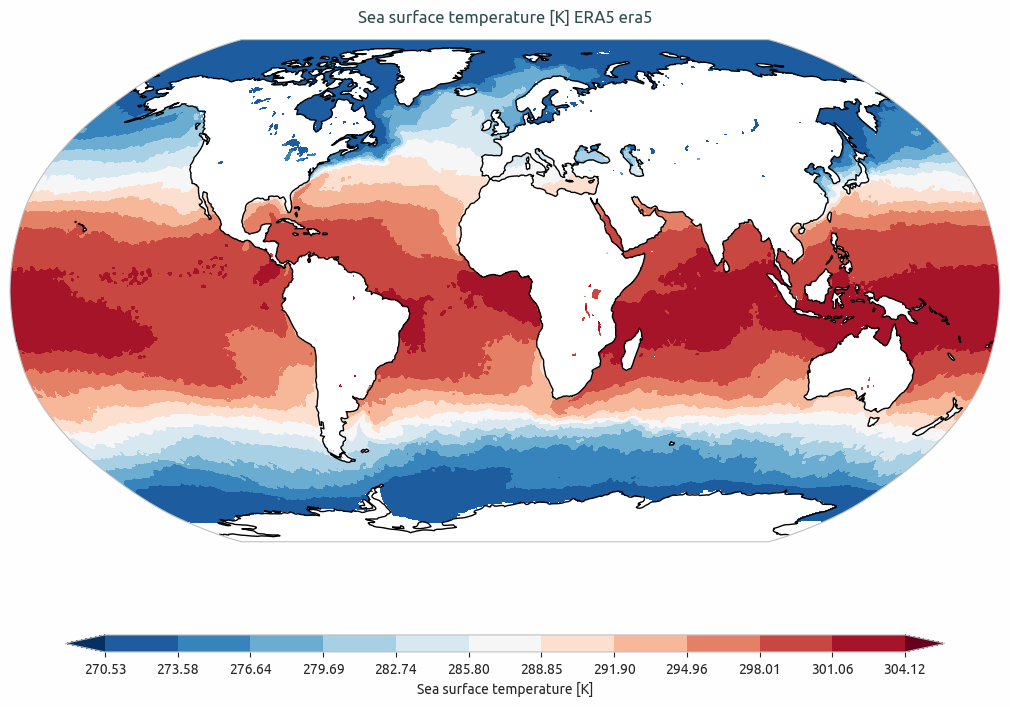

In [7]:
plot_single_map(tos_plot)

If nothing but the data is provided, the utility will plot the data on a map and adapt colorbar, title, etc. to the data.
The function is loading data in memory and applying a check if lon data have an empty central point to be fixed.

A custom title can be provided:

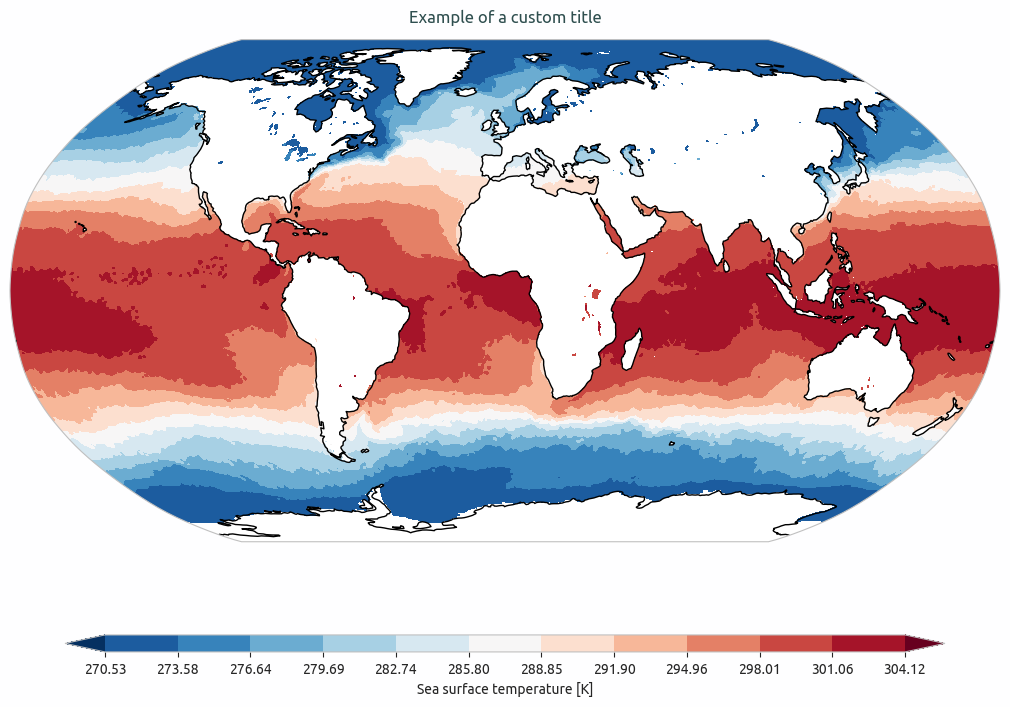

In [8]:
plot_single_map(tos_plot, title="Example of a custom title")

The minimum and maximum values can be provided and the possibility to choose to symmetrize the colorbar around zero is available.
If the symmetrize option is enabled, the minimum and maximum values are ignored if provided:

2025-05-12 12:40:32 :: plot_single_map :: DEBUG    -> Updating the log_level to DEBUG
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/cadaumar/.aqua
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> Configuration file found in /users/cadaumar/.aqua/config-aqua.yaml
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> Catalog found in /users/cadaumar/.aqua/config-aqua.yaml file are ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> Default catalog will be ci
2025-05-12 12:40:32 :: ConfigPath :: DEBUG    -> Catalog file is /users/cadaumar/.aqua/catalogs/ci/catalog.yaml
2025-05-12 12:40:32 :: Co

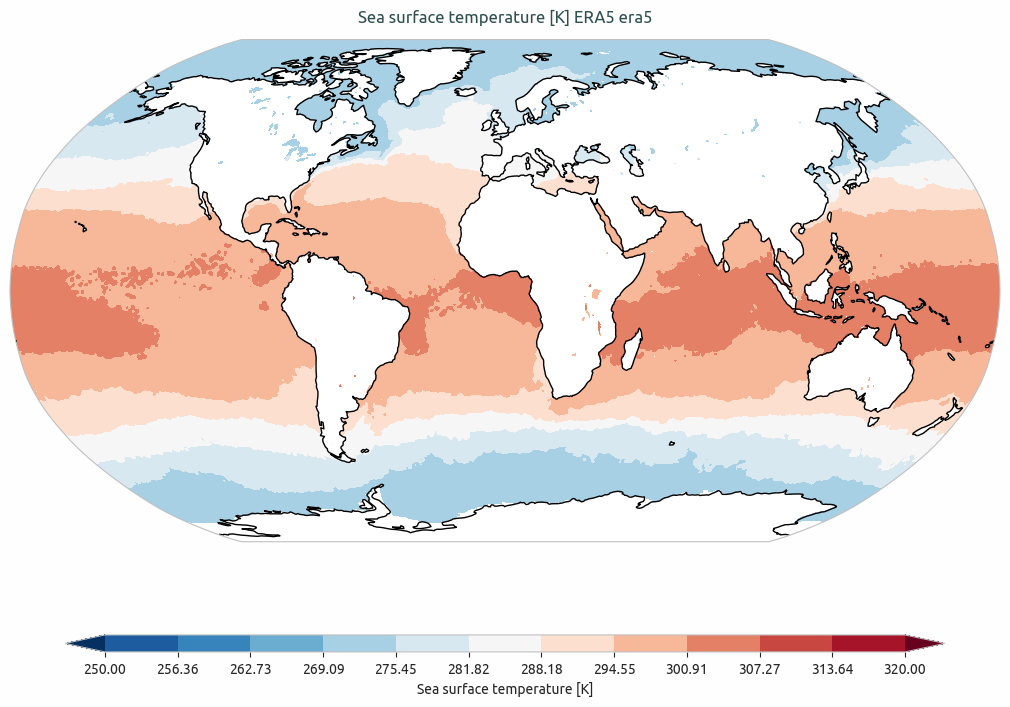

In [9]:
plot_single_map(tos_plot, vmin=250, vmax=320, loglevel="DEBUG")

As can be seen above contourplot is the standard representation (a number of levels can be provided), but pcolormesh is also available:

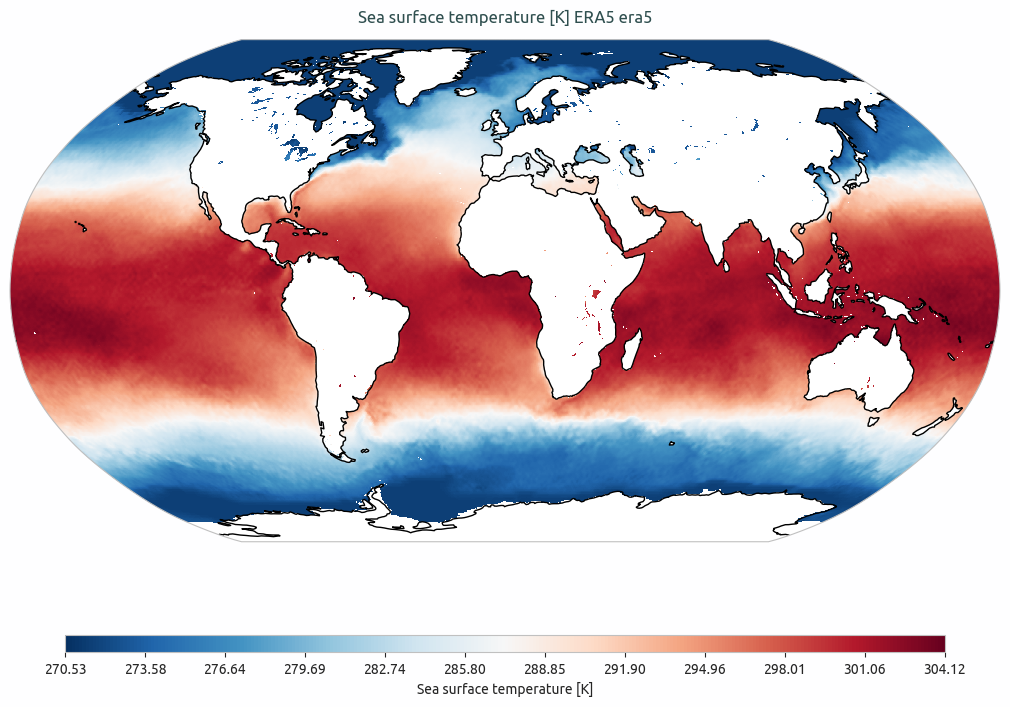

In [10]:
plot_single_map(tos_plot, contour=False)

It is also possible to change colormap and projection:

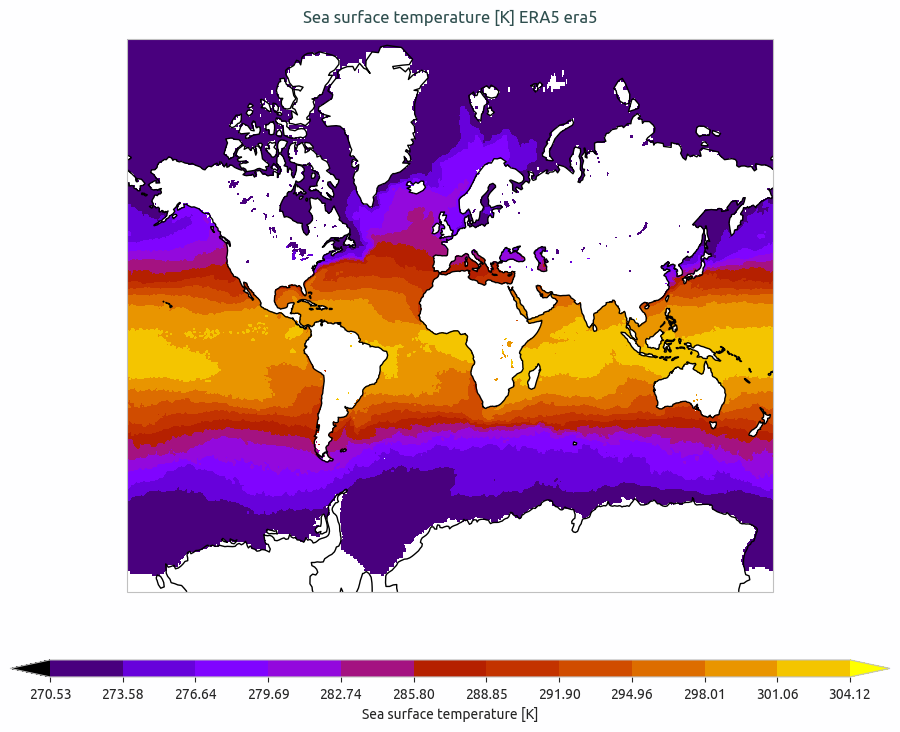

In [11]:
import cartopy.crs as ccrs
plot_single_map(tos_plot, cmap="gnuplot", proj=ccrs.Mercator())

## Maps and bias

The single map tool can be used to plot also biases. A function called `plot_single_map_diff` is provided, built on top of the previous function introduced here.
It will automatically plot the data as contour (not filled) map and the difference between the data and a reference set as contour filled map.

In [12]:
from aqua import plot_single_map_diff

Let's now plot the single timestep we have selected for the plot above and let's decide that we want to compare ito a slice of data.

In [13]:
tos_ref = data["tos"].isel(time=slice(0, 12)).mean("time")

2025-05-12 12:42:05 :: plot_single_map_diff :: DEBUG    -> Input data is not in HEALPix format.
2025-05-12 12:42:05 :: plot_single_map_diff :: DEBUG    -> Reference data is not in HEALPix format.
2025-05-12 12:42:05 :: plot_single_map :: DEBUG    -> Updating the log_level to DEBUG
2025-05-12 12:42:05 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-05-12 12:42:05 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/cadaumar/.aqua
2025-05-12 12:42:05 :: ConfigPath :: DEBUG    -> Configuration file found in /users/cadaumar/.aqua/config-aqua.yaml
2025-05-12 12:42:05 :: ConfigPath :: DEBUG    -> Catalog found in /users/cadaumar/.aqua/config-aqua.yaml file are ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-05-12 12:42:05 :: ConfigPath :: DEBUG    -> Available catalogs are ['ci', 'climatedt-e25.1', 'mn5-phase2', 'nextgems4', 'lumi-phase2', 'lumi-phase1', 'climatedt-phase1', 'obs']
2025-05-12 12:42:

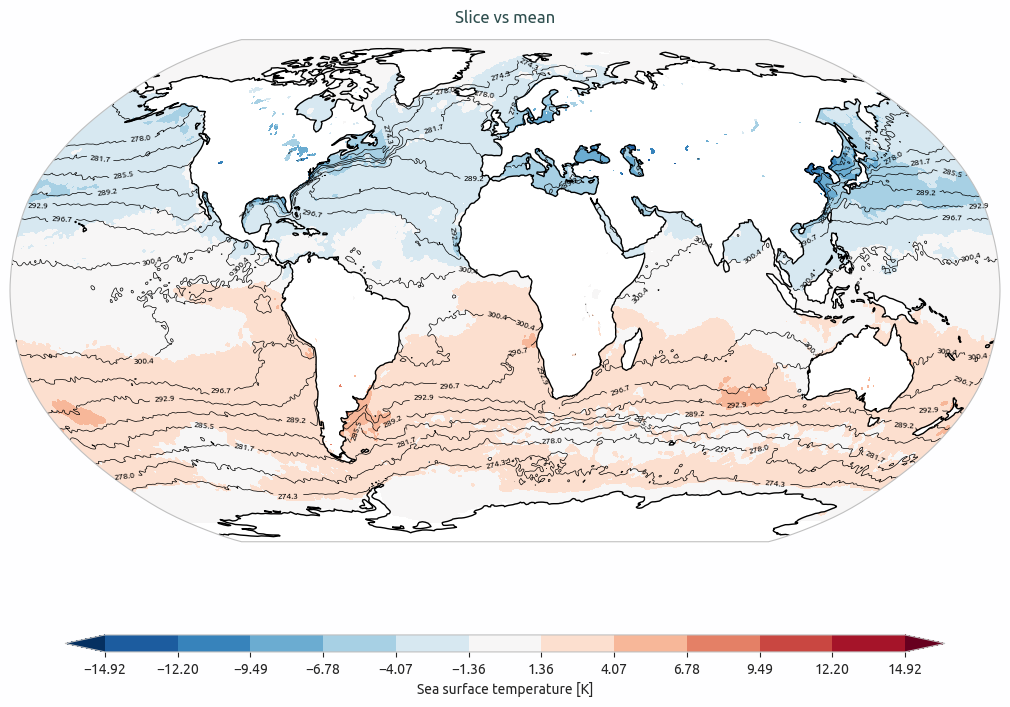

In [14]:
plot_single_map_diff(data=tos_plot, data_ref=tos_ref, title="Slice vs mean", loglevel='DEBUG')

Since the function is built for bias maps all the settings for the color map are with the symmetry option on by default, but other options are available.

## Area selection for a plot

It is possible to use the function and the utilities to plot a specific area of the globe.
The function to perform the area selection is available in the `utils` module.
Let's focus on the Nina3.4 region:

In [15]:
from aqua.util import area_selection

In [16]:
# Nino 3.4 region
lon_lim = (-170, -120)
lat_lim = (-5, 5)

tos_sel = area_selection(tos_plot, lon=lon_lim, lat=lat_lim)

We can analyze the data in the region. The area selection function by default is not dropping the data outside the region, so that a simple call to the plotting function will plot the data in the region and white elsewhere:

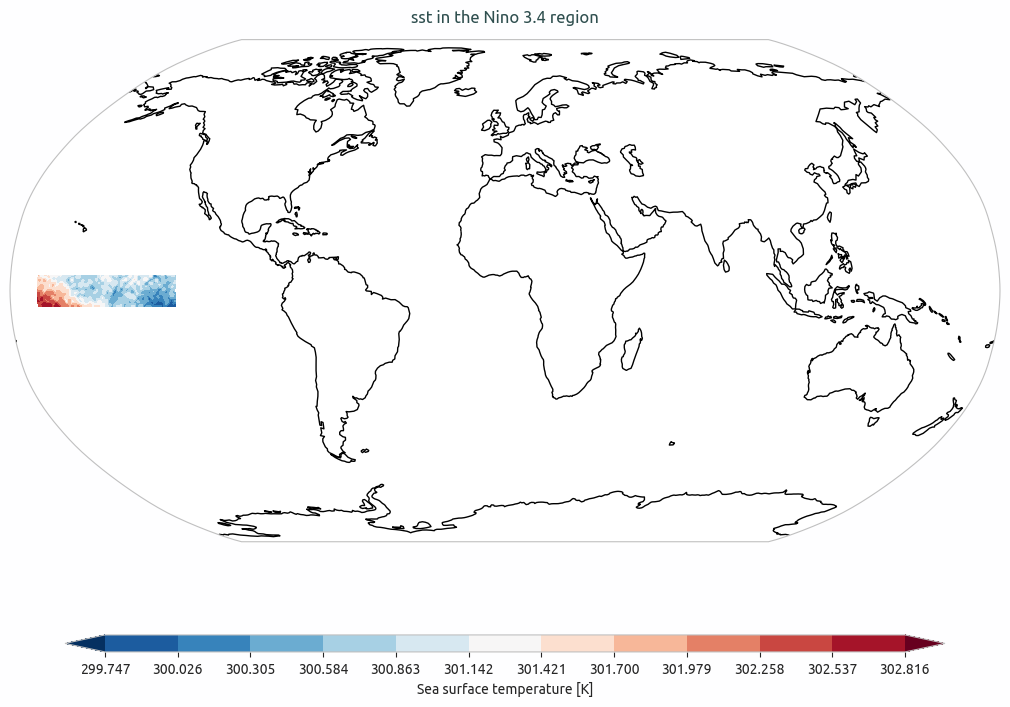

In [17]:
plot_single_map(tos_sel, title='sst in the Nino 3.4 region')

We need to drop the value outside the region. This can be done with the `drop=True` parameter in the area selection function:

In [18]:
tos_sel_box = area_selection(tos_plot, lon=lon_lim, lat=lat_lim, drop=True)
tos_sel_box

<xarray.DataArray 'tos' (lat: 41, lon: 201)> Size: 33kB
array([[302.4746 , 302.47266, 302.4795 , ..., 299.8369 , 299.8623 ,
        299.8662 ],
       [302.4629 , 302.4619 , 302.4707 , ..., 299.88672, 299.86523,
        299.86426],
       [302.49512, 302.49512, 302.49902, ..., 299.97363, 299.95117,
        299.92773],
       ...,
       [301.48242, 301.43848, 301.32617, ..., 300.85156, 300.8545 ,
        300.8086 ],
       [301.62305, 301.45703, 301.33984, ..., 300.88672, 300.8213 ,
        300.7744 ],
       [301.7627 , 301.59277, 301.42285, ..., 300.90137, 300.833  ,
        300.74902]], shape=(41, 201), dtype=float32)
Coordinates:
    time     datetime64[ns] 8B 1940-02-01
  * lon      (lon) float64 2kB 190.0 190.2 190.5 190.8 ... 239.5 239.8 240.0
  * lat      (lat) float64 328B -5.0 -4.75 -4.5 -4.25 -4.0 ... 4.25 4.5 4.75 5.0
Attributes:
    long_name:     Sea surface temperature
    units:         K
    code:          34
    table:         128
    history:       \n2025-05-12 12:38:55 AQUA💧: Variable renamed tos from SST...
    paramId:       262101
    shortName:     tos
    AQUA_model:    ERA5
    AQUA_exp:      era5
    AQUA_source:   monthly
    AQUA_catalog:  obs
    AQUA_version:  0.14.1-alpha

We unset the figsize to use the default one and we change the number of standard yticks.

/LUMI_TYKKY_ieilUjy/miniconda/envs/env1/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


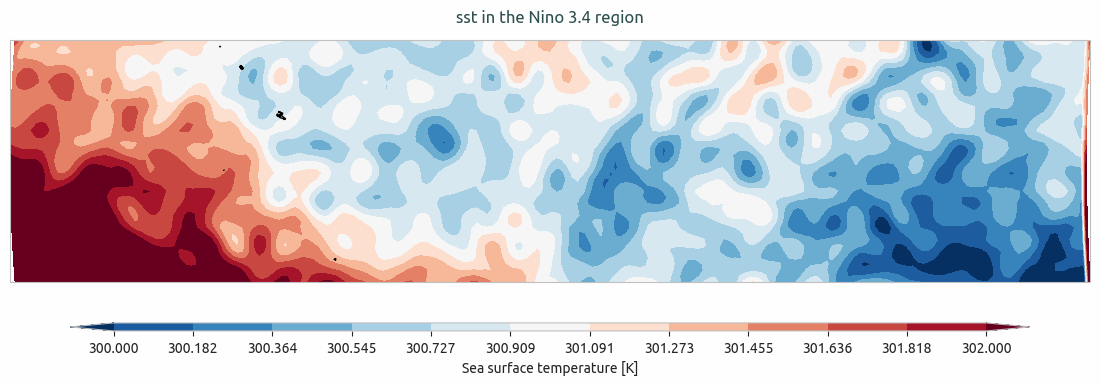

In [19]:
plot_single_map(tos_sel_box, title='sst in the Nino 3.4 region', figsize=(12,4), nyticks=5, vmin=300, vmax=302)